In [1]:
words = open('names.txt', 'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [8]:
b = {}
for w in words:
    chs = ['<s>'] + list(w) + ['<e>']
    for ch1, ch2 in zip(chs, chs[1:]):
        pair = (ch1, ch2)
        b[pair] = b.get(pair, 0) + 1
sorted(b.items(), key=lambda x: x[1], reverse=True)

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

In [29]:
chars = sorted(list(set(''.join(words))))
s_to_i = {s: i + 1 for i, s in enumerate(chars)}
i_to_s = {i + 1: s for i, s in enumerate(chars)}
s_to_i['.'] = 0
i_to_s[0] = '.'

In [32]:
import torch

ns = torch.zeros((27, 27), dtype=torch.int)
ns

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],


In [273]:
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ns[s_to_i[ch1]][s_to_i[ch2]] += 1
ns

tensor([[    0,  8820,  2612,  3084,  3380,  3062,   834,  1338,  1748,  1182,
          4844,  5926,  3144,  5076,  2292,   788,  1030,   184,  3278,  4110,
          2616,   156,   752,   614,   268,  1070,  1858],
        [13280,  1112,  1082,   940,  2084,  1384,   268,   336,  4664,  3300,
           350,  1136,  5056,  3268, 10876,   126,   164,   120,  6528,  2236,
          1374,   762,  1668,   322,   364,  4100,   870],
        [  228,   642,    76,     2,   130,  1310,     0,     0,    82,   434,
             2,     0,   206,     0,     8,   210,     0,     0,  1684,    16,
             4,    90,     0,     0,     0,   166,     0],
        [  194,  1630,     0,    84,     2,  1102,     0,     4,  1328,   542,
             6,   632,   232,     0,     0,   760,     2,    22,   152,    10,
            70,    70,     0,     0,     6,   208,     8],
        [ 1032,  2606,     2,     6,   298,  2566,    10,    50,   236,  1348,
            18,     6,   120,    60,    62,   756,   

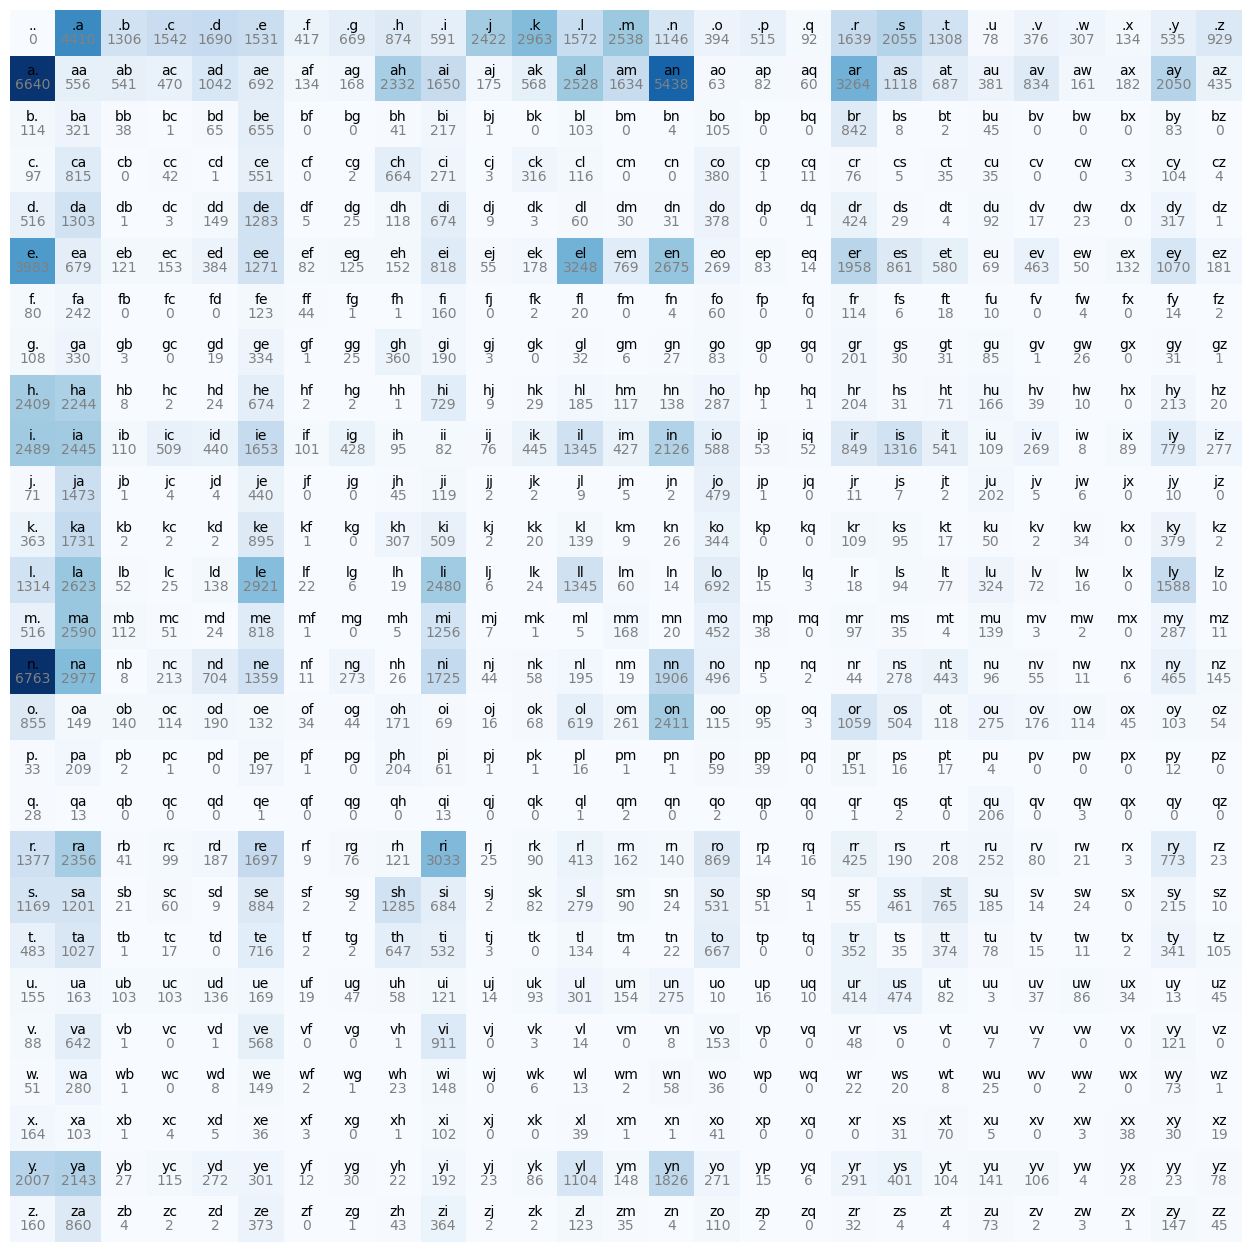

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 16))
plt.imshow(ns, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = i_to_s[i] + i_to_s[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='black')
        plt.text(j, i, ns[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [43]:
ns[0]

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [47]:
p = ns[0].float()
p = p / p.sum()
p

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [119]:
g = torch.Generator().manual_seed(2147483647)
s = torch.rand(3, generator=g)
s = s / s.sum()

# 创建一个包含概率的张量
probabilities = torch.tensor([0.1, 0.2, 0.3, 0.4])

In [108]:
# 生成num_samples个随机数，按s的概率，传入generator是确保每次的seed是同一个
torch.multinomial(probabilities, num_samples=100, replacement=True, generator=g)

tensor([3, 1, 3, 3, 1, 2, 3, 3, 3, 1, 2, 2, 3, 3, 3, 3, 0, 1, 1, 3, 3, 0, 3, 3,
        3, 2, 2, 3, 1, 2, 1, 1, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 0, 1, 3, 2, 1, 1,
        0, 3, 3, 3, 0, 3, 3, 2, 2, 3, 3, 3, 1, 0, 1, 2, 2, 3, 3, 1, 3, 3, 0, 2,
        0, 2, 1, 1, 1, 0, 2, 0, 3, 2, 2, 1, 2, 3, 2, 2, 3, 3, 2, 0, 3, 2, 2, 3,
        2, 2, 2, 2])

In [150]:
g = torch.Generator().manual_seed(2147483647)
# 先从第0行.*中，比如simple到的是5号e，接着就从第5行e*中去simple，不断循环直到simple到*.
for i in range(10):
    ix = 0
    out = []
    while True:
        # 取得第ix行中，每个字符串的概率
        p = ns[ix].float()
        p = p / p.sum()
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(i_to_s[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [274]:
# ns是(27,27)的二维矩阵

# 矩阵除法的broadcast机制规则：
# 根据两个矩阵的shape，从尾部开始，维度大小要么相等，要么其中一个是1或不存在
# 比如x.shape=(5,3,1), y.shape=(3,4), 先比较最后一位，x是1符合，接着x和y都是3符合，接着y不存在符合
# 最后x和y都会复制扩展为一个(5,3,4)的数组再做运算

# dim=1是把每行的总和加为一列，keepdim=True是让矩阵仍然是二维矩阵，(27,1)
# 因为有的字母组合概率是0，比如jq，那么当模型出现这样的字母组合时就没法计算损失，所以我们给整个模型+1
P = (ns+1).float()
P = P / P.sum(1, keepdim=True)

g = torch.Generator().manual_seed(2147483647)
# 现在相当于提前拿到了每个元素的概率
for i in range(10):
    ix = 0
    out = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(i_to_s[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cony.
a.
nn.
kohin.
tolian.
juee.
ksahnaauranilevias.


In [275]:
# 之前，我们是通过计数每个字母组合，然后得到每个字母组合的概率表，最终得到预测结果
# 下面，我们通过梯度下降的机器学习方式，也去得到这样的概率表

# 目标是最大化数据相对于模型参数的可能性，相当于最大化其对数可能性（因为对数是单调的），等同于最小化其负对数的可能性，相当于最小化其平均负对数的可能性
log_likelihood = 0.0
n = 0
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        prop = P[ix1, ix2]
        # log函数，x越接近1，y越接近0； x越接近0，y负数值越大
        # log(a*b*c) = log(a) + log(b) + log(c)
        logprop = torch.log(prop)
        log_likelihood += logprop
        n +=1
        # print(f'{ch1}{ch2}:{prop*100: .2f}%, {logprop: .4f}')
print(f"对数可能性：{log_likelihood}")
nll = -log_likelihood
print(f"负对数可能性：{nll}")
print(f"平均负对数可能性：{nll/n}")


对数可能性：-559938.8125
负对数可能性：559938.8125
平均负对数可能性：2.4543004035949707


In [196]:
# 创建训练集
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)


In [198]:
xs, ys

(tensor([ 0,  5, 13, 13,  1]), tensor([ 5, 13, 13,  1,  0]))

In [203]:
# one-hot encoding
import torch.nn.functional as F

x_encode = F.one_hot(xs, num_classes=27).float()
x_encode

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

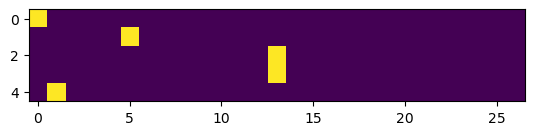

In [204]:
plt.imshow(x_encode)

In [205]:
x_encode.dtype

torch.float32

In [212]:
W = torch.randn((27, 1))
# 矩阵乘法(m,n) @ (n,p) = (m,p)
# 乘积矩阵 C 中的元素 c_ij（第 i 行，第 j 列）是通过将 A 的第 i 行的每个元素与 B 的第 j 列的对应元素相乘然后求和得到的
x_encode @ W

tensor([[-1.3256],
        [-0.0713],
        [-0.1344],
        [-0.1344],
        [-0.4211]])

In [216]:
# Forward process
g = torch.Generator().manual_seed(2147483647)
x_encode = F.one_hot(xs, num_classes=27).float() # input to the neuron network, with one-hot encoding
W = torch.randn((27, 27), generator=g)  # random init 27 neurons' weights, each neuron receive 27 inputs
logits = x_encode @ W  # predict log-counts

# counts和probs的计算过程就是softmax
counts = logits.exp()  # counts相当于之前的ns
probs = counts / counts.sum(1, keepdim=True)  # probabilities for the next char


In [222]:
nlls = torch.zeros(5)
for i in range(5):
    x = xs[i].item()
    y = ys[i].item()
    print("======================")
    print(f"bigram example {i+1}: {i_to_s[x]}---{i_to_s[y]} (index is {x} & {y}) ")
    print(f"input to the network is {x}")
    print(f"output probalities from the network is {probs[i]}")
    print(f"label(actual next char) is {y}")
    p = probs[i,y]
    print(f"probability current in the net is {p.item()}")
    logp = torch.log(p)
    print(f"log likelihood is {logp.item()}")
    nlls[i] = -logp
print("average negative log likelihood is loss, is ", nlls.mean().item())

bigram example 1: .---e (index is 0 & 5) 
input to the network is 0
output probalities from the network is tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label(actual next char) is 5
probability current in the net is 0.01228625513613224
log likelihood is -4.399273872375488
bigram example 2: e---m (index is 5 & 13) 
input to the network is 5
output probalities from the network is tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label(actual next char) is 13
probability current in the net is 0.018050700426101685
log likelihood is -4.014570713043213
bigram example 3: m---m (index is 13 & 13) 
input to the netw

In [232]:
# 所以以上步骤就相当于是：
# log_items = [-probs[0, ys[0]].log() , -probs[1, ys[1]].log() , -probs[2, ys[2]].log() , -probs[3, ys[3]].log() , -probs[4, ys[4]].log()]
# loss = torch.tensor(log_items).mean()
# 也可以简写为
loss = -probs[torch.arange(5), ys].log().mean().item()
loss

3.7693049907684326

In [276]:
# 整个过程：

# 创建训练集
xs, ys = [], []

for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = s_to_i[ch1]
        ix2 = s_to_i[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print(f"number of examples is {num}")

g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)



number of examples is 228146


In [285]:
for k in range(100):
    # forward process
    x_encode = F.one_hot(xs, num_classes=27).float()
    logits = x_encode @ W
    counts = logits.exp() 
    probs = counts / counts.sum(1, keepdim=True) 
    # 这里0.01*(W**2).mean()就相当于是之前的(ns+1)
    loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
    print(f"{k}: {loss}")
    
    # backward process
    W.grad = None # init grad to zero
    loss.backward()
    
    # update
    W.data += -50 * W.grad

0: 2.4805400371551514
1: 2.4805400371551514
2: 2.480539083480835
3: 2.4805386066436768
4: 2.4805376529693604
5: 2.4805376529693604
6: 2.480536699295044
7: 2.4805362224578857
8: 2.4805357456207275
9: 2.4805352687835693
10: 2.480534791946411
11: 2.480534076690674
12: 2.4805335998535156
13: 2.4805331230163574
14: 2.480532646179199
15: 2.48053240776062
16: 2.480531692504883
17: 2.4805309772491455
18: 2.4805307388305664
19: 2.480530261993408
20: 2.480529308319092
21: 2.4805290699005127
22: 2.4805283546447754
23: 2.480527639389038
24: 2.480527639389038
25: 2.48052716255188
26: 2.4805264472961426
27: 2.4805262088775635
28: 2.480525493621826
29: 2.480524778366089
30: 2.4805245399475098
31: 2.4805240631103516
32: 2.4805235862731934
33: 2.480523109436035
34: 2.480522394180298
35: 2.4805221557617188
36: 2.4805214405059814
37: 2.4805214405059814
38: 2.4805209636688232
39: 2.480520486831665
40: 2.480520009994507
41: 2.4805192947387695
42: 2.4805190563201904
43: 2.4805185794830322
44: 2.480518102645

In [286]:
# 因为就是把之前那种count的方案中的概率作为目标的
# 这个方案生成的名字也是近似的
g = torch.Generator().manual_seed(2147483647)
for i in range(10):
    ix = 0
    out = []
    while True:
        x_encode = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = x_encode @ W
        counts = logits.exp() 
        probs = counts / counts.sum(1, keepdim=True) 
        
        ix = torch.multinomial(probs, num_samples=1, replacement=True, generator=g).item()
        out.append(i_to_s[ix])
        if ix == 0:
            break
    print(''.join(out))

junide.
janasah.
p.
cfay.
a.
nn.
kohin.
tolian.
juwe.
ksahnaauranilevias.
